In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('../../data/processed/sleep_cycle_productivity_cleaned.csv')

In [ ]:
data

,Date,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level,Weekday
0,2024-04-12,30,2,23.33,4.61,5.28,3,86,116,8.808920,8,3,6,Friday
1,2024-11-04,40,0,21.02,2.43,5.41,5,32,88,6.329833,10,3,7,Monday
2,2024-08-31,20,1,22.10,3.45,5.35,7,17,59,8.506306,10,9,10,Saturday
3,2024-02-22,30,2,23.10,6.65,7.55,8,46,80,6.070240,8,4,2,Thursday
4,2024-02-23,40,2,21.42,4.17,6.75,10,61,94,11.374994,8,7,9,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-01-03,30,0,22.78,4.15,5.37,1,55,96,9.384504,5,2,1,Wednesday
4996,2024-06-02,50,1,21.48,5.39,7.91,4,70,177,5.016193,5,6,2,Sunday
4997,2024-08-13,40,0,22.02,2.82,4.80,6,21,139,11.788651,2,7,1,Tuesday
4998,2024-12-26,50,2,23.47,7.87,8.40,9,15,161,7.093145,8,1,6,Thursday


In [ ]:
data.dtypes

,0
Date,object
Age,int64
Gender,int64
Sleep Start Time,float64
Sleep End Time,float64
Total Sleep Hours,float64
Sleep Quality,int64
Exercise (mins/day),int64
Screen Time Before Bed (mins),int64
Work Hours (hrs/day),float64


In [ ]:
print("Sleep Quality 중앙값:", data['Sleep Quality'].astype(int).median())

Sleep Quality 중앙값: 5.0


In [ ]:
from pandas.api.types import CategoricalDtype

# 연속형 -> 순서형
ordered_score = CategoricalDtype(categories=list(range(1, 11)), ordered=True)

# 적용
data['Sleep Quality'] = data['Sleep Quality'].astype(ordered_score)
data['Productivity Score'] = data['Productivity Score'].astype(ordered_score)
data['Mood Score'] = data['Mood Score'].astype(ordered_score)
data['Stress Level'] = data['Stress Level'].astype(ordered_score)

#gender 범주형 변환
data['Weekday'] = data['Weekday'].astype('category')
data['Gender'] = data['Gender'].astype('category')

In [ ]:
data.dtypes

,0
Date,object
Age,int64
Gender,category
Sleep Start Time,float64
Sleep End Time,float64
Total Sleep Hours,float64
Sleep Quality,category
Exercise (mins/day),int64
Screen Time Before Bed (mins),int64
Work Hours (hrs/day),float64


####**로지스틱 회귀**####

In [ ]:
# 1. 문자열 포함된 X
X = data[['Age', 'Gender', 'Sleep Start Time', 'Sleep End Time',
          'Total Sleep Hours', 'Exercise (mins/day)',
          'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)',
          'Productivity Score', 'Mood Score', 'Stress Level', 'Weekday']]

# 2. 더미 변수 처리
X_dummies = pd.get_dummies(X, drop_first=True)

# 3. 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dummies)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# 1. 이진 종속변수 생성
data['Sleep_Quality_Binary'] = (data['Sleep Quality'] >= 5).astype(int)
y = data['Sleep_Quality_Binary']

X = data[['Age', 'Gender', 'Sleep Start Time', 'Sleep End Time',
          'Total Sleep Hours', 'Exercise (mins/day)',
          'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)',
          'Productivity Score', 'Mood Score', 'Stress Level', 'Weekday']]

X_dummies = pd.get_dummies(X, drop_first=True)

# 3. train/test 분할
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=5)

# 4. 모델 학습
log_rg = LogisticRegression(max_iter=1500, class_weight='balanced', random_state=1)
log_rg.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = log_rg.predict(X_test)
print(classification_report(y_test, y_pred))

NameError: name 'data' is not defined

In [ ]:
y_pred=log_rg.predict(X_test)

print('Training set score: {:.4f}'.format(log_rg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(log_rg.score(X_test, y_test)))

Training set score: 0.5533
Test set score: 0.4870


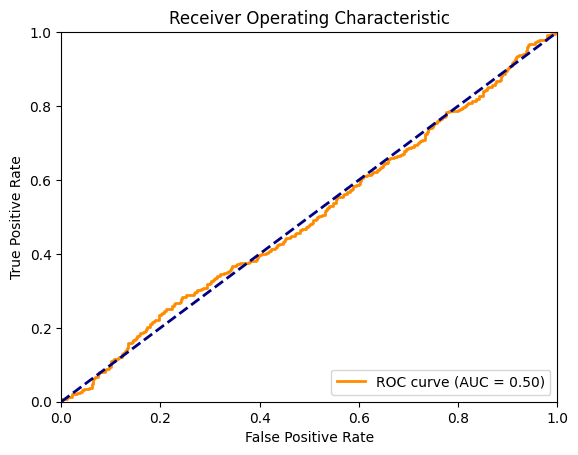

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

y_scores = log_rg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test,y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

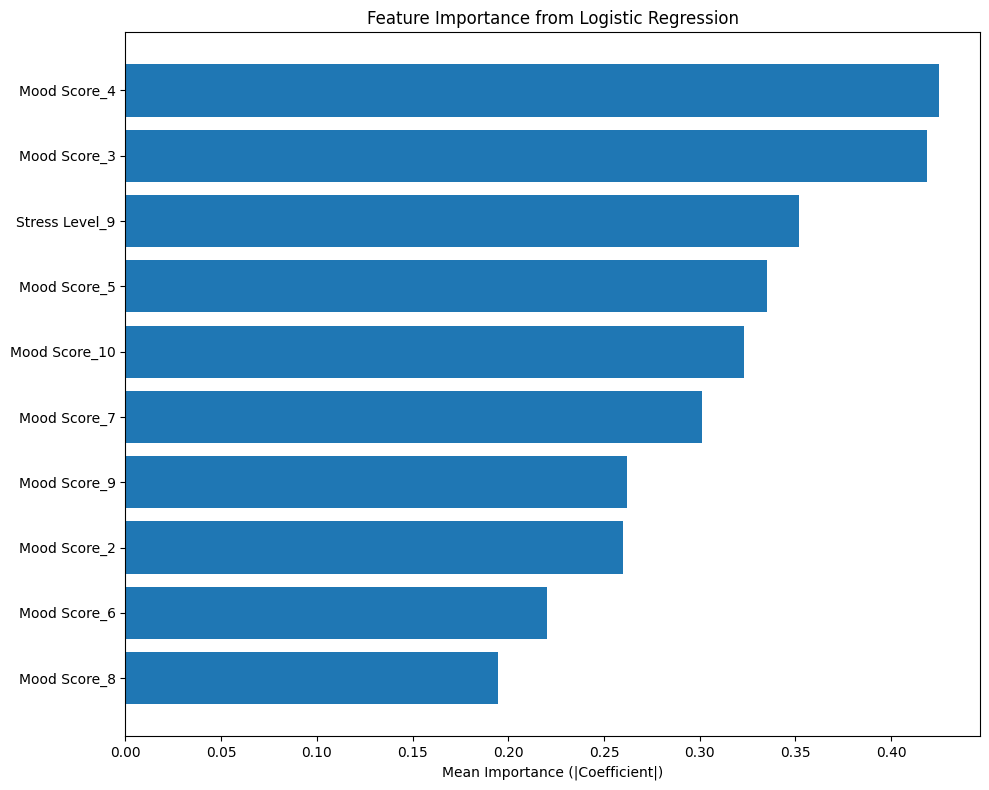

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

importance = pd.Series(np.abs(log_rg.coef_).mean(axis=0), index=X_dummies.columns)

importance_sorted = importance.sort_values(ascending=True)

top10 = importance_sorted.tail(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(top10.index, top10.values)
plt.xlabel('Mean Importance (|Coefficient|)')
plt.title('Feature Importance from Logistic Regression')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

X_dummies = pd.get_dummies(X, drop_first=True)

log_rg_full = LogisticRegression(max_iter=1500, class_weight='balanced', random_state=1)
log_rg_full.fit(X_dummies, y)

# 3. 중요도 계산 (coef_)
importance = pd.Series(np.abs(log_rg_full.coef_).mean(axis=0), index=X_dummies.columns)

top_features = importance.sort_values(ascending=False).head(10).index
X_top = X_dummies[top_features]

X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=5)

log_rg = LogisticRegression(max_iter=1500, class_weight='balanced', random_state=1)
log_rg.fit(X_train, y_train)

print("Training set score: {:.4f}".format(log_rg.score(X_train, y_train)))
print("Test set score: {:.4f}".format(log_rg.score(X_test, y_test)))

Training set score: 0.5570
Test set score: 0.5280


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 1. 이진 타깃
data['Sleep_Quality_Binary'] = (data['Sleep Quality'] >= 5).astype(int)
y = data['Sleep_Quality_Binary']

# 2. 설명 변수 + 더미 처리
X = data[['Age', 'Gender', 'Sleep Start Time', 'Sleep End Time',
          'Total Sleep Hours', 'Exercise (mins/day)',
          'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)',
          'Productivity Score', 'Mood Score', 'Stress Level', 'Weekday']]
# 더미 처리 + float형 변환
X_dummies = pd.get_dummies(X, drop_first=True).astype(float)

# 모델 학습
model = LogisticRegression(max_iter=1500, class_weight='balanced', random_state=1)
model.fit(X_dummies, y)

# 계수와 스케일 기반 중요도 계산
coef = model.coef_[0]
scaled_weight = coef * (X_dummies.max(axis=0) - X_dummies.min(axis=0)) / X_dummies.std(axis=0)

# 정렬 후 출력
sorted_idx = np.argsort(np.abs(scaled_weight))[::-1]
for i in sorted_idx:
    print(f"{X_dummies.columns[i]}: {scaled_weight[i]:.4f}")

Mood Score_5: 1.0592
Mood Score_10: 1.0462
Mood Score_3: 1.0064
Stress Level_9: -0.9341
Mood Score_2: 0.8919
Mood Score_4: 0.8876
Productivity Score_10: 0.7694
Stress Level_7: -0.6792
Mood Score_9: 0.6559
Mood Score_7: 0.6538
Mood Score_6: 0.4380
Stress Level_4: -0.4166
Mood Score_8: 0.4081
Stress Level_10: -0.3506
Productivity Score_3: 0.3251
Weekday_Thursday: 0.3180
Weekday_Tuesday: -0.2997
Productivity Score_9: 0.2914
Productivity Score_8: 0.2695
Weekday_Sunday: 0.2072
Stress Level_5: 0.2000
Productivity Score_2: 0.1724
Stress Level_3: -0.1619
Stress Level_8: -0.1539
Weekday_Monday: 0.1406
Gender_2: 0.1326
Productivity Score_6: -0.1007
Weekday_Saturday: -0.1004
Productivity Score_7: -0.0926
Stress Level_6: -0.0856
Productivity Score_4: -0.0811
Stress Level_2: -0.0738
Sleep End Time: 0.0711
Total Sleep Hours: -0.0700
Work Hours (hrs/day): -0.0363
Productivity Score_5: -0.0174
Weekday_Wednesday: 0.0173
Sleep Start Time: -0.0120
Exercise (mins/day): 0.0029
Age: -0.0028
Gender_1: 0.0021

<ipython-input-36-23b720ffa1c8>:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{X_dummies.columns[i]}: {scaled_weight[i]:.4f}")


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

X_dummies = pd.get_dummies(X, drop_first=True)

log_rg_full = LogisticRegression(max_iter=1500, class_weight='balanced', random_state=1)
log_rg_full.fit(X_dummies, y)

# 3. 중요도 계산 (coef_)
sorted_idx = np.argsort(np.abs(scaled_weight))[::-1]

top_features = sorted_idx.sort_values(ascending=False).head(10).index
X_top = X_dummies[top_features]

X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=5)

log_rg = LogisticRegression(max_iter=1500, class_weight='balanced', random_state=1)
log_rg.fit(X_train, y_train)

print("Training set score: {:.4f}".format(log_rg.score(X_train, y_train)))
print("Test set score: {:.4f}".format(log_rg.score(X_test, y_test)))

Training set score: 0.5627
Test set score: 0.5310


####**변수 중요도**####

- 1번 변수 중요도 코드의 경우 계수의 크기를 기준으로 분석한 것이고, 두번째의 경우 값의 범위와 표준편차를 보정해서 정리한 것. (계수가 클수록 예측 확률에 기여도가 크다고 판단하기 때문)

- 1번 모델의 경우 기울기의 정도만 보고 변수의 중요도를 파악하고 있고, 2번 모델의 경우 변수의 단위와 범위 차이까지 고려하여 보정하고 있음

- 2번 모델의 경우 이 변수가 1 단위만큼 변화하였을 때 로지스틱 결과에 얼마나 영향을 주는지 확인하는 것

####**랜덤 포레스트**####

In [ ]:
import pandas as pd

data = pd.read_csv('sleep_cycle_productivity_cleaned.csv')

In [ ]:
from pandas.api.types import CategoricalDtype

# 연속형 -> 순서형
ordered_score = CategoricalDtype(categories=list(range(1, 11)), ordered=True)

# 적용
data['Sleep Quality'] = data['Sleep Quality'].astype(ordered_score)
data['Productivity Score'] = data['Productivity Score'].astype(ordered_score)
data['Mood Score'] = data['Mood Score'].astype(ordered_score)
data['Stress Level'] = data['Stress Level'].astype(ordered_score)

#gender 범주형 변환
data['Weekday'] = data['Weekday'].astype('category')
data['Gender'] = data['Gender'].astype('category')

In [ ]:
data['Sleep_Quality_Binary'] = (data['Sleep Quality'] >= 5).astype(int)
y = data['Sleep_Quality_Binary']

              precision    recall  f1-score   support

           0     0.4298    0.3688    0.3969       423
           1     0.5808    0.6412    0.6096       577

    accuracy                         0.5260      1000
   macro avg     0.5053    0.5050    0.5033      1000
weighted avg     0.5169    0.5260    0.5196      1000



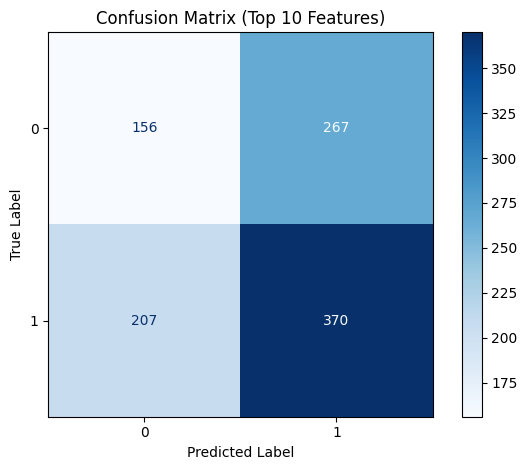

In [ ]:
##최적의 모델 기준

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. 이진 타깃 설정
data['Sleep_Quality_Binary'] = (data['Sleep Quality'] >= 5).astype(int)
y = data['Sleep_Quality_Binary']

# 2. 독립 변수 + 더미 처리
X = data[['Age', 'Gender', 'Sleep Start Time', 'Sleep End Time',
          'Total Sleep Hours', 'Exercise (mins/day)',
          'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)',
          'Productivity Score', 'Mood Score', 'Stress Level', 'Weekday']]

X_dummies = pd.get_dummies(X, drop_first=True)

# 3. train/test 분할
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=5)

# 4. 랜덤 포레스트 학습
rf = RandomForestClassifier(
    max_depth=5,
    min_samples_leaf=10,
    n_estimators=500,
    class_weight='balanced',
    random_state=1
)
rf.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Top 10 Features)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# confusion matrix 생성
cm = confusion_matrix(y_test, y_pred)

# 각 요소 추출
TN = cm[0, 0]  # 실제 0, 예측 0
FP = cm[0, 1]  # 실제 0, 예측 1
FN = cm[1, 0]  # 실제 1, 예측 0
TP = cm[1, 1]  # 실제 1, 예측 1

# 특이도 계산
specificity = TN / (TN + FP)

print(f"특이도 (Specificity): {specificity:.4f}")

특이도 (Specificity): 0.3688


In [ ]:
sy_pred=rf.predict(X_test)

print('Training set score: {:.4f}'.format(rf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test, y_test)))

Training set score: 0.7077
Test set score: 0.5260


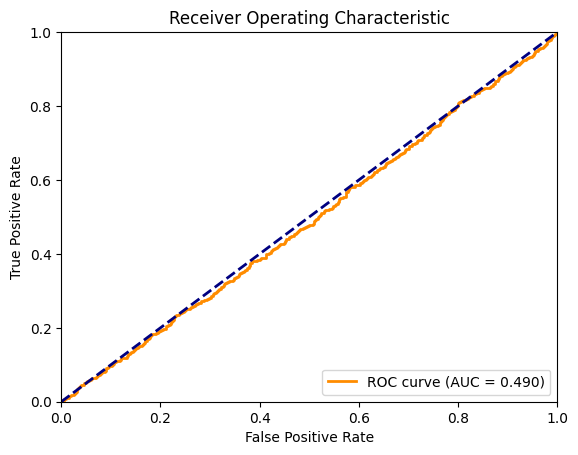

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

y_scores = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test,y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X_dummies, y)

# 변수 중요도 추출
import pandas as pd

feature_importances = pd.Series(rf.feature_importances_, index=X_dummies.columns)
feature_importances = feature_importances.sort_values(ascending=False)

              precision    recall  f1-score   support

           0     0.3994    0.3026    0.3443       813
           1     0.5903    0.6883    0.6356      1187

    accuracy                         0.5315      2000
   macro avg     0.4948    0.4954    0.4899      2000
weighted avg     0.5127    0.5315    0.5172      2000



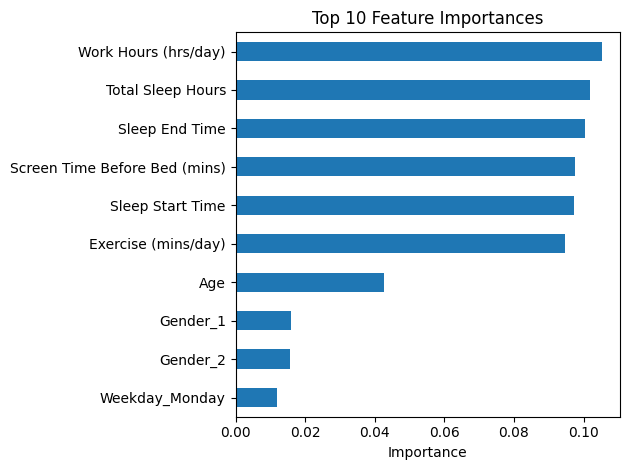

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

top_features = feature_importances.head(10).index
X_top = X_dummies[top_features]

X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.4, random_state=5)

rf_top =rf = RandomForestClassifier(
    max_depth=5,
    min_samples_leaf=10,
    n_estimators=500,
    class_weight='balanced',
    random_state=1
)
rf_top.fit(X_train, y_train)

y_pred = rf_top.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

import matplotlib.pyplot as plt

feature_importances.head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

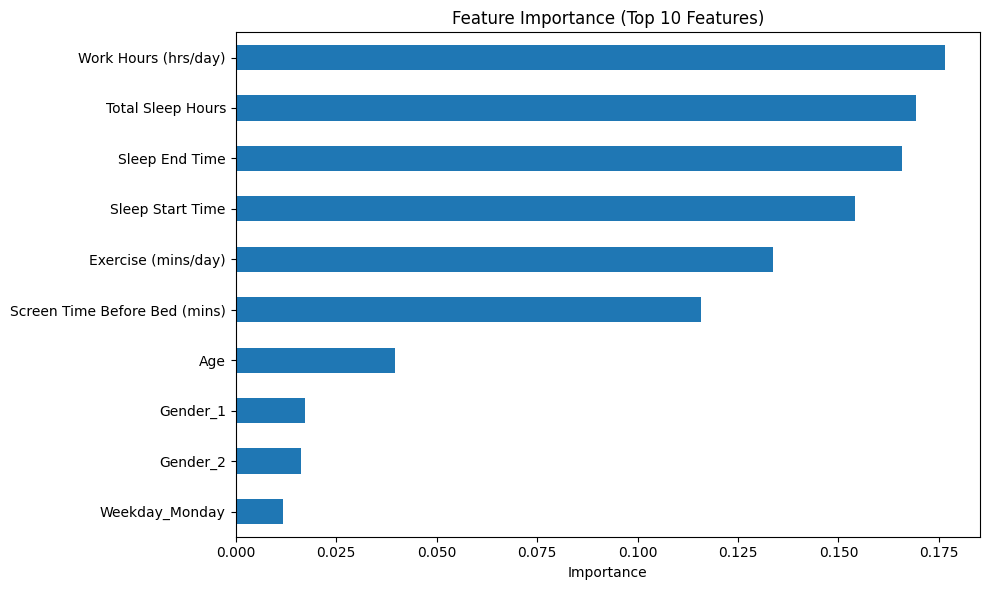

In [ ]:
importance = pd.Series(rf.feature_importances_, index=X_top.columns)
importance_sorted = importance.sort_values(ascending=True)

importance_sorted.plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance (Top 10 Features)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0     0.3125    0.0123    0.0237       813
           1     0.5920    0.9815    0.7385      1187

    accuracy                         0.5875      2000
   macro avg     0.4522    0.4969    0.3811      2000
weighted avg     0.4784    0.5875    0.4479      2000

Training set score: 0.6363
Test set score: 0.5875


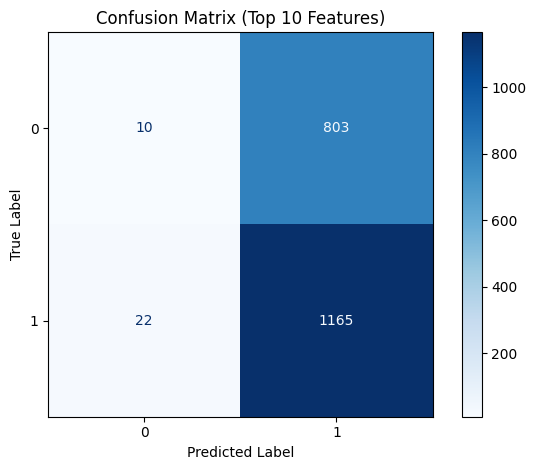

In [ ]:
# 1. 전체 더미 처리
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_dummies = pd.get_dummies(X, drop_first=True)

rf_full = RandomForestClassifier(random_state=1)
rf_full.fit(X_dummies, y)

top_features = pd.Series(rf_full.feature_importances_, index=X_dummies.columns).sort_values(ascending=False).head(10).index

X_top = X_dummies[top_features]
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.4, random_state=5)

rf = RandomForestClassifier(max_depth=5, random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred,digits=4))

print("Training set score: {:.4f}".format(rf.score(X_train, y_train)))
print("Test set score: {:.4f}".format(rf.score(X_test, y_test)))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Top 10 Features)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# confusion matrix 생성
cm = confusion_matrix(y_test, y_pred)

# 각 요소 추출
TN = cm[0, 0]  # 실제 0, 예측 0
FP = cm[0, 1]  # 실제 0, 예측 1
FN = cm[1, 0]  # 실제 1, 예측 0
TP = cm[1, 1]  # 실제 1, 예측 1

# 특이도 계산
specificity = TN / (TN + FP)

print(f"특이도 (Specificity): {specificity:.4f}")

특이도 (Specificity): 0.0123


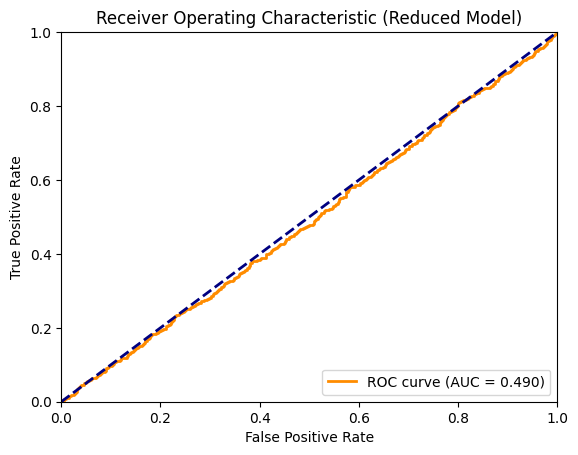

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

y_scores = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test,y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Reduced Model)')
plt.legend(loc='lower right')
plt.show()